### Configurable Variables
Variables that can be modified in this notebook
- `input_data` — path to the input folder containing the dataset
- `supress_warnings` — boolean flag to enable/disable warning messages (`True`/`False`)
---
**Set following variables if you are running notebook interactively.**

In [1]:
input_path_default = "output_datasets/SN124_A595688_Rep2/adata_QC_filtered.normalized.h5ad"
suppress_warnings_default = False

# SPATIAL TRANSCRIPTOMICS – IDENTIFICATION OF SVGs WITH SOMDE

Spatial transcriptomics links gene expression to tissue location. To find **spatially variable genes (SVGs)**, we use **SOMDE**, a fast method that detects spatial expression patterns using **self-organizing maps** and **statistical modeling**. This notebook demonstrates how to load data, run SOMDE, and visualize the resulting SVGs.


### Load variables from CMD

In [2]:
SUPPRESS_WARNINGS = None
try:
    if suppress_warnings == "True":
        SUPPRESS_WARNINGS = True
    else:
        SUPPRESS_WARNINGS = False
except NameError:
    SUPPRESS_WARNINGS = suppress_warnings_default

## Suppress Warnings (Optional)

* Suppress warnings for cleaner output.
* Comment out the line below if warnings are desired for debugging.

In [3]:
# Suppress warnings for cleaner output
import warnings
import os

if SUPPRESS_WARNINGS:
    print("Ignoring warnings.")
    warnings.filterwarnings('ignore')

### Environment setup

1. Install the necessary packages using `pip` if they are not already installed:

In [4]:
# use conda env from readme

2. Import necessary libraries:

In [5]:
# Import of libraries for working with spatial transcriptomics data
import os
import sys
import somoclu
from somde import plotgene
from somde import SomNode
import pandas as pd
import numpy as np

3. load the dataset
  * **Option 1**: Import data directly from Google Drive (requires Google Colab).
  * **Option 2**: Load dataset path from CMD.

In [6]:
# OPTION 1
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# OPTION 2
DATA_PATH = None
try:
    DATA_PATH = input_data
except NameError:
    DATA_PATH = input_path_default

if DATA_PATH is None or not os.path.exists(DATA_PATH):
    print("ERROR: Datapath (", DATA_PATH ,") not found.")
    sys.exit()

print("Using input path:", DATA_PATH)

DATA_FOLDER_NAME = DATA_PATH.split("/")[-1].strip()

# save_dir = "figures/show/qc/" + DATA_FOLDER_NAME
# os.makedirs(save_dir, exist_ok=True)

Using input path: output_datasets/SN124_A595688_Rep2/adata_QC_filtered.normalized.h5ad


# SOMDE analaysis

In [36]:
dataname = "output_datasets/SN124_A595688_Rep2/"

# Load expression counts
df = pd.read_csv(os.path.join(dataname, "count.csv"), sep=',', index_col=0)

# Load metadata / spot info
corinfo = pd.read_csv(os.path.join(dataname, "coords.csv"), sep=',', index_col=0)

# Add total counts per spot
corinfo["total_count"] = df.sum(axis=1)

# Extract spatial coordinates
X = corinfo[['x', 'y']].values.astype(np.float32)

# Print shapes / preview
print("Counts matrix shape:", df.shape)
print(df.head())
print("Spatial coordinates shape:", X.shape)
print("Metadata preview:")
print(corinfo.sort_values(by=['x', 'y'], ascending=True).head())

Counts matrix shape: (387, 36601)
                    MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACCGTTCGTCCAGG-1          0.0      0.0    0.0         0.0         0.0   
AAAGGCTCTCGCGCCG-1          0.0      0.0    0.0         0.0         0.0   
AAAGGGATGTAGCAAG-1          0.0      0.0    0.0         0.0         0.0   
AAATTAACGGGTAGCT-1          0.0      0.0    0.0         0.0         0.0   
AACCGAGCTTGGTCAT-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACCGTTCGTCCAGG-1         0.0         0.0         0.0         0.0   
AAAGGCTCTCGCGCCG-1         0.0         0.0         0.0         0.0   
AAAGGGATGTAGCAAG-1         0.0         0.0         0.0         0.0   
AAATTAACGGGTAGCT-1         0.0         0.0         0.0         0.0   
AACCGAGCTTGGTCAT-1         0.0         0.0         0.0         0.0   

                    AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACCGTTCGTCCAGG-1 

using 19*19 SOM nodes for 387 points


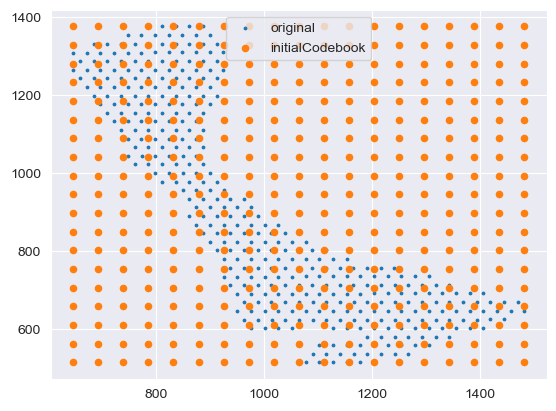

In [54]:
som = SomNode(X, 1)
som.viewIniCodebook()

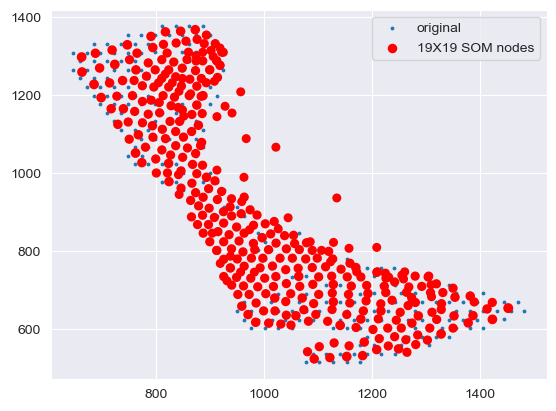

In [55]:
som.view()

In [56]:
ndf, ninfo = som.mtx(df.T)
print(ndf.shape)
print(ninfo.shape)

X_nodes = ninfo.values  # shape: (16, 2)


(36601, 308)
(308, 3)


First 10 available gene names:
Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1'],
      dtype='object')


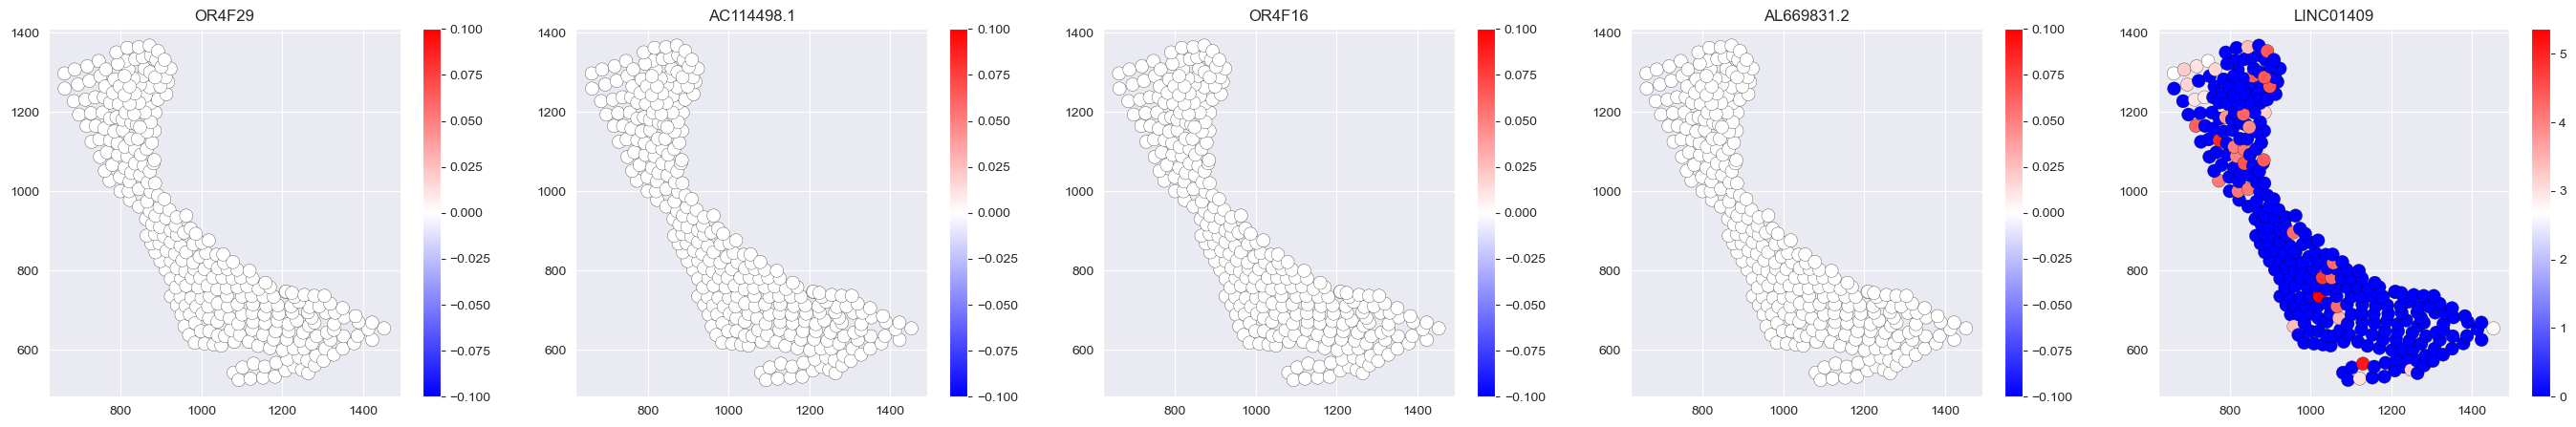

In [61]:
gene_names = df.columns

# To see the first few gene names
print("First 10 available gene names:")
print(gene_names[:10])


plotgene(
    X=X_nodes,          # Uses the corrected (scaled) grid coordinates
    mtx=ndf,
    draw_list=gene_names[10:15],
    result=som,
    sp=100,             # Large point size
    lw=0.2,
    N=10,
    plotsize=5
)